***Import Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


***Load Data***

In [ ]:
import pandas as pd
path=('/content/CO2 Emission.csv')
data=pd.read_csv(path)

***EDA(Exploratory Data Analysis)***

In [ ]:
data.head()

,MODELYEAR,CARS,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.tail()

,MODELYEAR,CARS,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
500,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
501,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
502,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
503,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
504,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 505 non-null    int64  
 1   ENGINESIZE                505 non-null    float64
 2   CYLINDERS                 505 non-null    int64  
 3   FUELTYPE                  505 non-null    object 
 4   FUELCONSUMPTION_COMB      505 non-null    float64
 5   FUELCONSUMPTION_COMB_MPG  505 non-null    int64  
 6   CO2EMISSIONS              505 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 27.7+ KB


In [ ]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,505.0,495.000000,505.000000,498.000000,499.000000,498.000000,505.000000,505.000000
mean,2014.0,3.113939,5.576238,12.713454,9.041283,11.025100,27.566337,247.041584
std,0.0,1.412060,1.878932,3.795290,2.497400,3.170505,7.625410,60.840543
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,9.900000,7.200000,8.700000,22.000000,200.000000
50%,2014.0,3.000000,6.000000,12.000000,8.500000,10.400000,27.000000,239.000000
75%,2014.0,3.700000,6.000000,14.800000,10.300000,12.700000,32.000000,288.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


In [ ]:
print("\nDataset shape (rows, columns):")
print(data.shape)


Dataset shape (rows, columns):
(505, 13)


In [ ]:
print("\nColumn names:")
print(data.columns)


Column names:
Index(['MODELYEAR', 'CARS', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [ ]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
MODELYEAR                    0
CARS                         0
MODEL                        0
VEHICLECLASS                 0
ENGINESIZE                  10
CYLINDERS                    0
TRANSMISSION                 0
FUELTYPE                     0
FUELCONSUMPTION_CITY         7
FUELCONSUMPTION_HWY          6
FUELCONSUMPTION_COMB         7
FUELCONSUMPTION_COMB_MPG     0
CO2EMISSIONS                 0
dtype: int64


In [ ]:
print("\nSummary statistics for categorical columns:")
print(data.describe(include=[object]))


Summary statistics for categorical columns:
        CARS         MODEL VEHICLECLASS TRANSMISSION FUELTYPE
count    505           505          505          505      505
unique    38           331           15           21        4
top     FORD  F150 FFV 4X4      COMPACT           A6        X
freq      67             7          113          115      249


In [ ]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
0


***Data Visualization***

***Brands of Cars***

In [ ]:
print("We have total",len(data['CARS'].unique()),"Car Companies Data")
data_brand = data['CARS'].value_counts().reset_index().rename(columns={'count':'Count'})
data_brand.head(20)

We have total 38 Car Companies Data


,CARS,Count
0,FORD,67
1,VOLKSWAGEN,35
2,CHEVROLET,34
3,BMW,32
4,GMC,27
5,MERCEDES-BENZ,21
6,PORSCHE,18
7,KIA,17
8,AUDI,17
9,HONDA,16


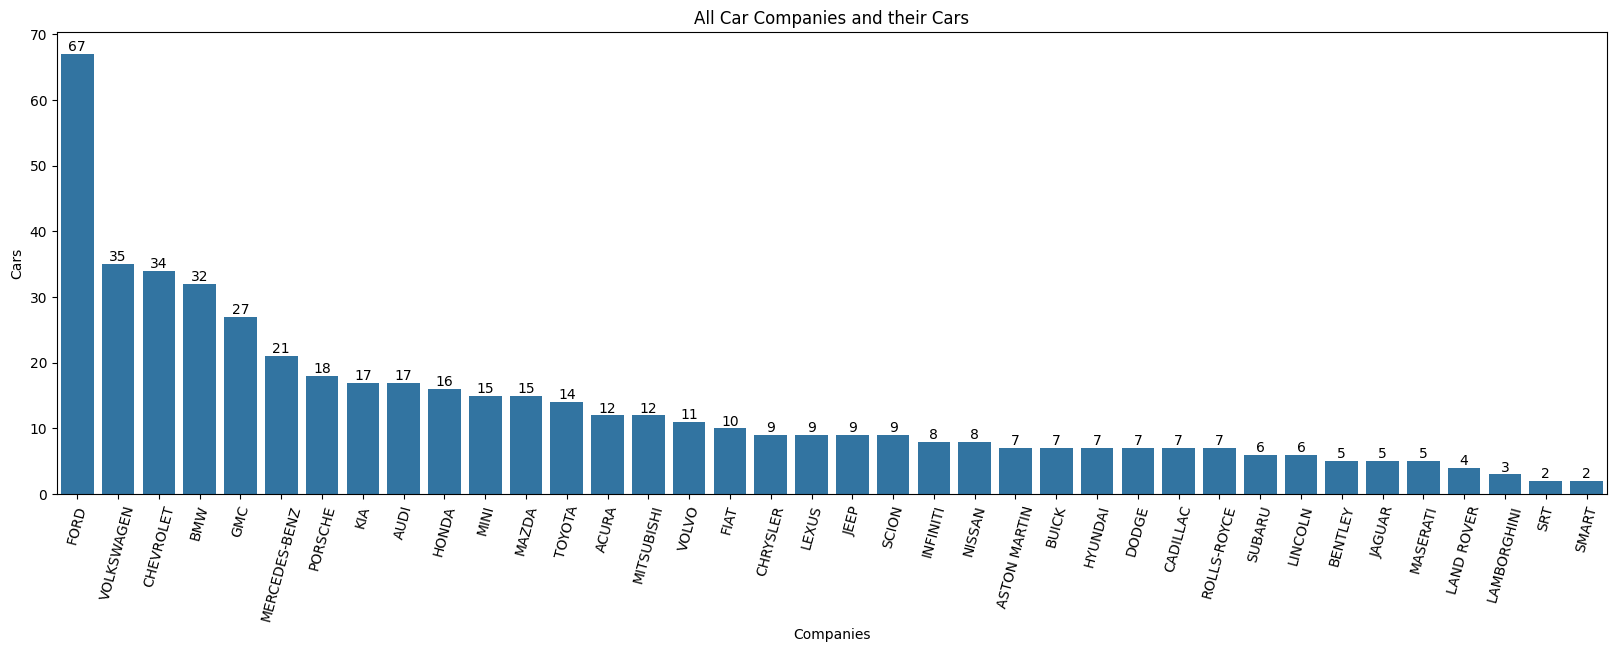

In [ ]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data = data_brand, x = "CARS",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

***Models of Cars***

In [ ]:
print("We have total",len(data['MODEL'].unique()),"Car Models")
data_model = data['MODEL'].value_counts().reset_index().rename(columns={'count':'Count'})[:25]
data_model.head(20)

We have total 331 Car Models


,MODEL,Count
0,F150 FFV 4X4,7
1,FOCUS FFV,6
2,SIERRA,5
3,SIERRA 4WD,5
4,MUSTANG,5
5,PASSAT,5
6,JETTA,4
7,CRUZE,4
8,FORTE,4
9,FUSION,4


***Vechile Class***

In [ ]:
print("We have total",len(data['VEHICLECLASS'].unique()),"Vehicle Class")
data_vehicle_class = data['VEHICLECLASS'].value_counts().reset_index().rename(columns={'count':'Count'})
data_vehicle_class

We have total 15 Vehicle Class


,VEHICLECLASS,Count
0,COMPACT,113
1,SUV - SMALL,90
2,MID-SIZE,68
3,SUV - STANDARD,47
4,TWO-SEATER,44
5,SUBCOMPACT,33
6,FULL-SIZE,32
7,MINICOMPACT,20
8,PICKUP TRUCK - STANDARD,20
9,STATION WAGON - SMALL,18


***EngineSize of Cars***

In [ ]:
print("We have total",len(data['ENGINESIZE'].unique()),"Types of Engine Size")
data_engine_size = data['ENGINESIZE'].value_counts().reset_index().rename(columns={'count':'Count'})
data_engine_size.head(20)

We have total 41 Types of Engine Size


,ENGINESIZE,Count
0,2.0,103
1,3.5,44
2,3.6,39
3,1.6,35
4,2.4,29
5,3.0,29
6,3.7,21
7,1.8,21
8,1.4,17
9,2.5,17


***Cylinders***

In [ ]:
print("We have total",len(data['CYLINDERS'].unique()),"Types of Cylinders")
data_cylinders = data['CYLINDERS'].value_counts().reset_index().rename(columns={'count':'Count'})
data_cylinders.head(20)

We have total 7 Types of Cylinders


,CYLINDERS,Count
0,4,233
1,6,160
2,8,84
3,12,14
4,5,7
5,10,4
6,3,3


*Transmissions of Cars*

In [ ]:
data['TRANSMISSION'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A8', 'M7',
       'A4', 'M5', 'AM6', 'AV', 'A5', 'AS7', 'A7', 'AS9', 'AV6', 'AS4',
       'AM5'], dtype=object)

*Here we have to map similar labels into a single label for our Transmission column.*

In [ ]:
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["M5", "M6", "M7"]), "Manual", data["TRANSMISSION"])

In [ ]:
print("We have total",len(data['TRANSMISSION'].unique()),"TRANSMISSION")
data_transmission = data['TRANSMISSION'].value_counts().reset_index().rename(columns={'count':'Count'})
data_transmission

We have total 5 TRANSMISSION


,TRANSMISSION,Count
0,Automatic with Select Shift,176
1,Automatic,172
2,Manual,108
3,Continuously Variable,27
4,Automated Manual,22


***Fuel Type of Cars***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 505 non-null    int64  
 1   CARS                      505 non-null    object 
 2   MODEL                     505 non-null    object 
 3   VEHICLECLASS              505 non-null    object 
 4   ENGINESIZE                495 non-null    float64
 5   CYLINDERS                 505 non-null    int64  
 6   TRANSMISSION              505 non-null    object 
 7   FUELTYPE                  505 non-null    object 
 8   FUELCONSUMPTION_CITY      498 non-null    float64
 9   FUELCONSUMPTION_HWY       499 non-null    float64
 10  FUELCONSUMPTION_COMB      498 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  505 non-null    int64  
 12  CO2EMISSIONS              505 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 51.4+ KB


In [ ]:
data['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [ ]:
data["FUELTYPE"] = np.where(data["FUELTYPE"]=="Z", "Premium Gasoline", data["FUELTYPE"])
data["FUELTYPE"] = np.where(data["FUELTYPE"]=="X", "Regular Gasoline", data["FUELTYPE"])
data["FUELTYPE"] = np.where(data["FUELTYPE"]=="D", "Diesel", data["FUELTYPE"])
data["FUELTYPE"] = np.where(data["FUELTYPE"]=="E", "Ethanol(E85)", data["FUELTYPE"])

In [ ]:
print("We have total",len(data['FUELTYPE'].unique()),"Fuel Types")
data_fuel_type = data['FUELTYPE'].value_counts().reset_index().rename(columns={'count':'Count'})
data_fuel_type

We have total 4 Fuel Types


,FUELTYPE,Count
0,Regular Gasoline,249
1,Premium Gasoline,204
2,Ethanol(E85),35
3,Diesel,17


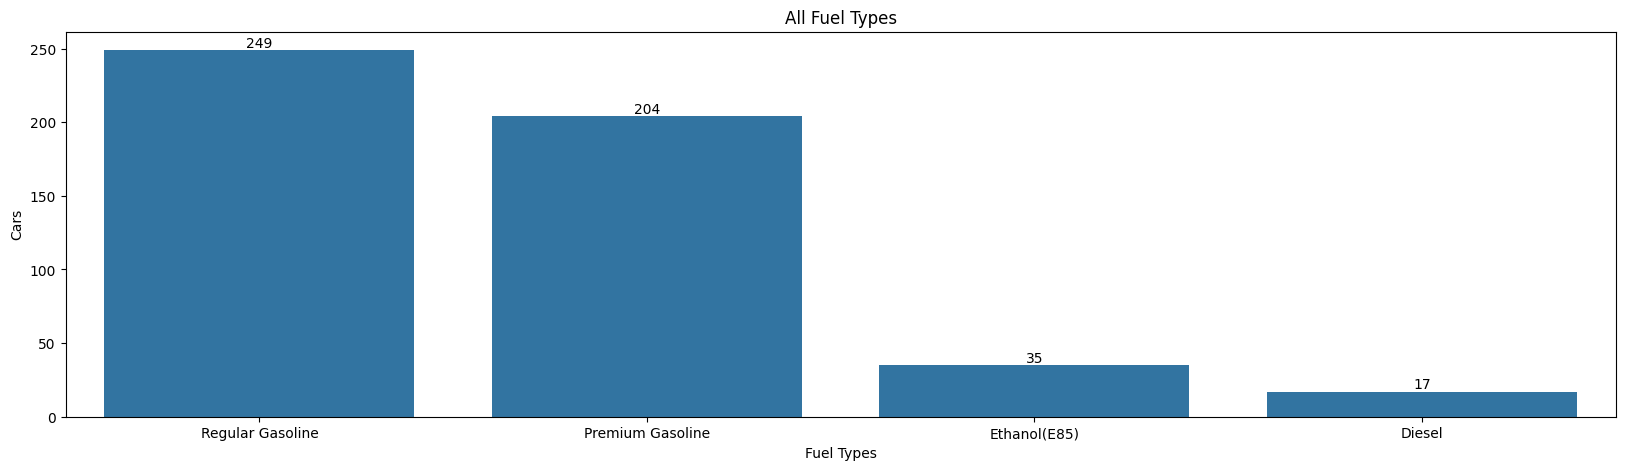

In [ ]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = data_fuel_type, x = "FUELTYPE",  y= "Count")
plt.title("All Fuel Types")
plt.xlabel("Fuel Types")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

***Displot***

<ipython-input-29-aea587cfb654>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CO2EMISSIONS'])


<Axes: xlabel='CO2EMISSIONS', ylabel='Density'>

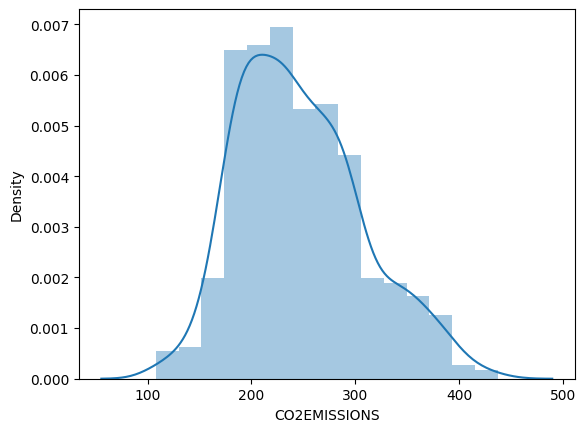

In [ ]:
sns.distplot(data['CO2EMISSIONS'])

*CO2 Emission with Brand*

In [ ]:
data_co2_cars = data.groupby(['CARS'])['CO2EMISSIONS'].mean().sort_values().reset_index()

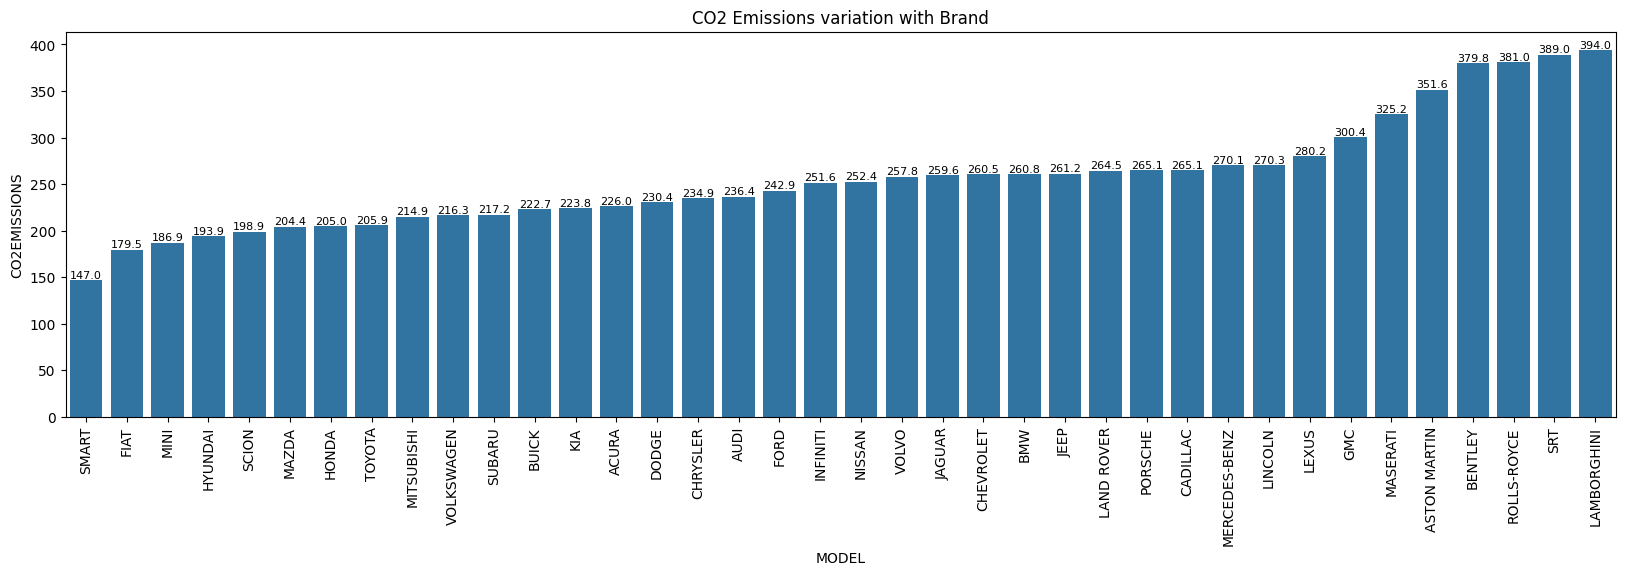

In [ ]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = data_co2_cars, x = "CARS",  y= "CO2EMISSIONS")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("MODEL")
plt.ylabel("CO2EMISSIONS")
plt.bar_label(figure8.containers[0], fontsize=8, fmt='%.1f')
plt.show()

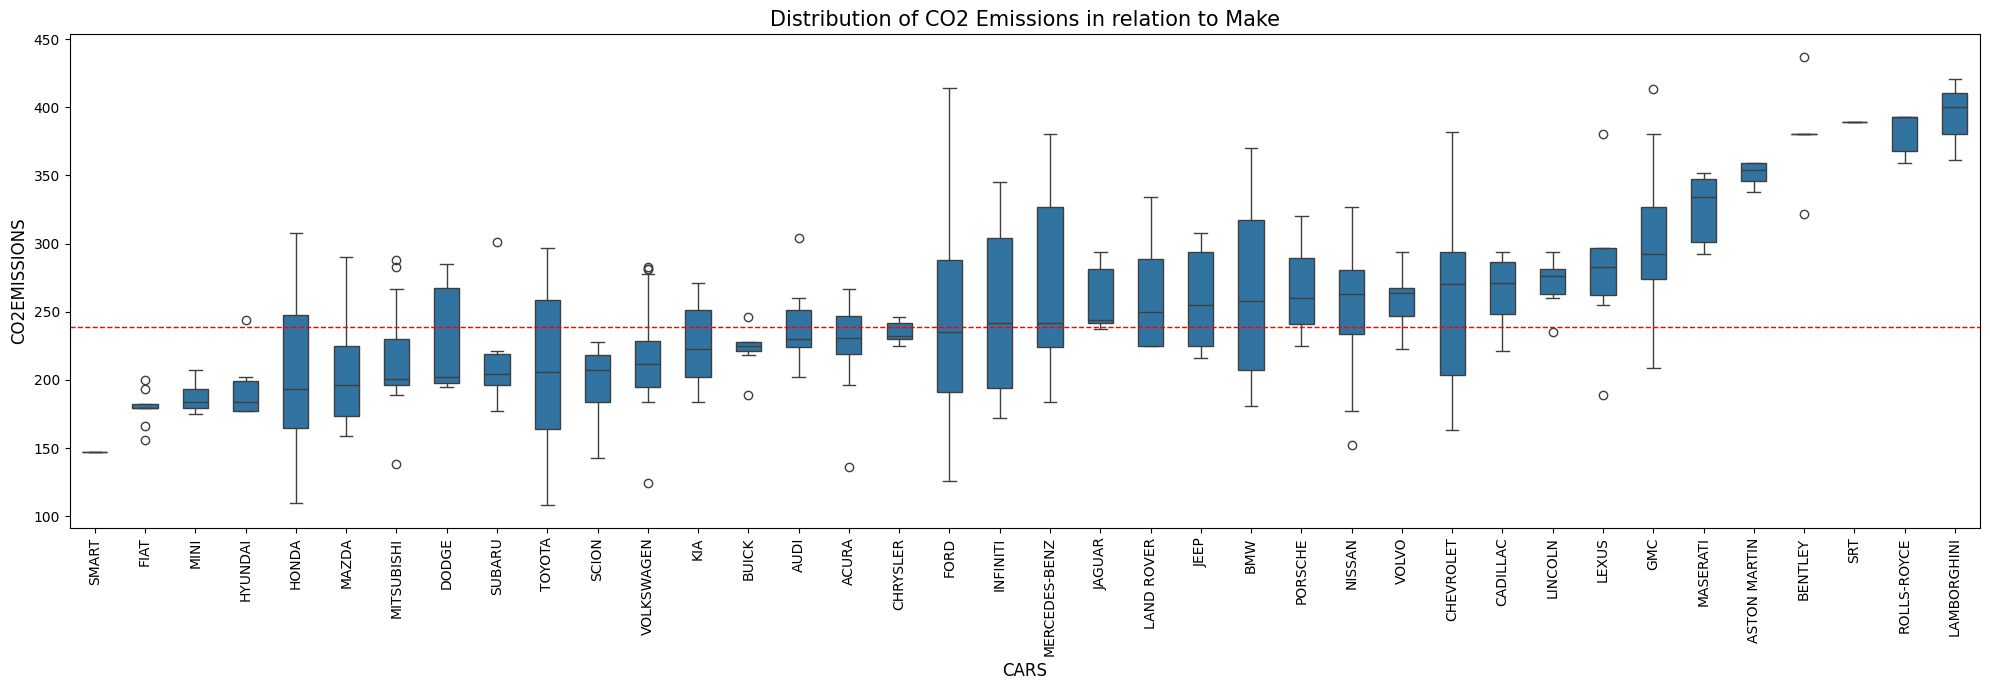

In [ ]:
plt.figure(figsize=(20,7))
order = data.groupby("CARS")["CO2EMISSIONS"].median().sort_values(ascending=True).index
sns.boxplot(x="CARS", y="CO2EMISSIONS", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("CARS", fontsize=12)
plt.ylabel("CO2EMISSIONS", fontsize=12)
plt.axhline(data["CO2EMISSIONS"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

*CO2 Emissions variation with Vehicle Class*

In [ ]:
data_co2_vehicle_class = data.groupby(['VEHICLECLASS'])['CO2EMISSIONS'].mean().sort_values().reset_index()

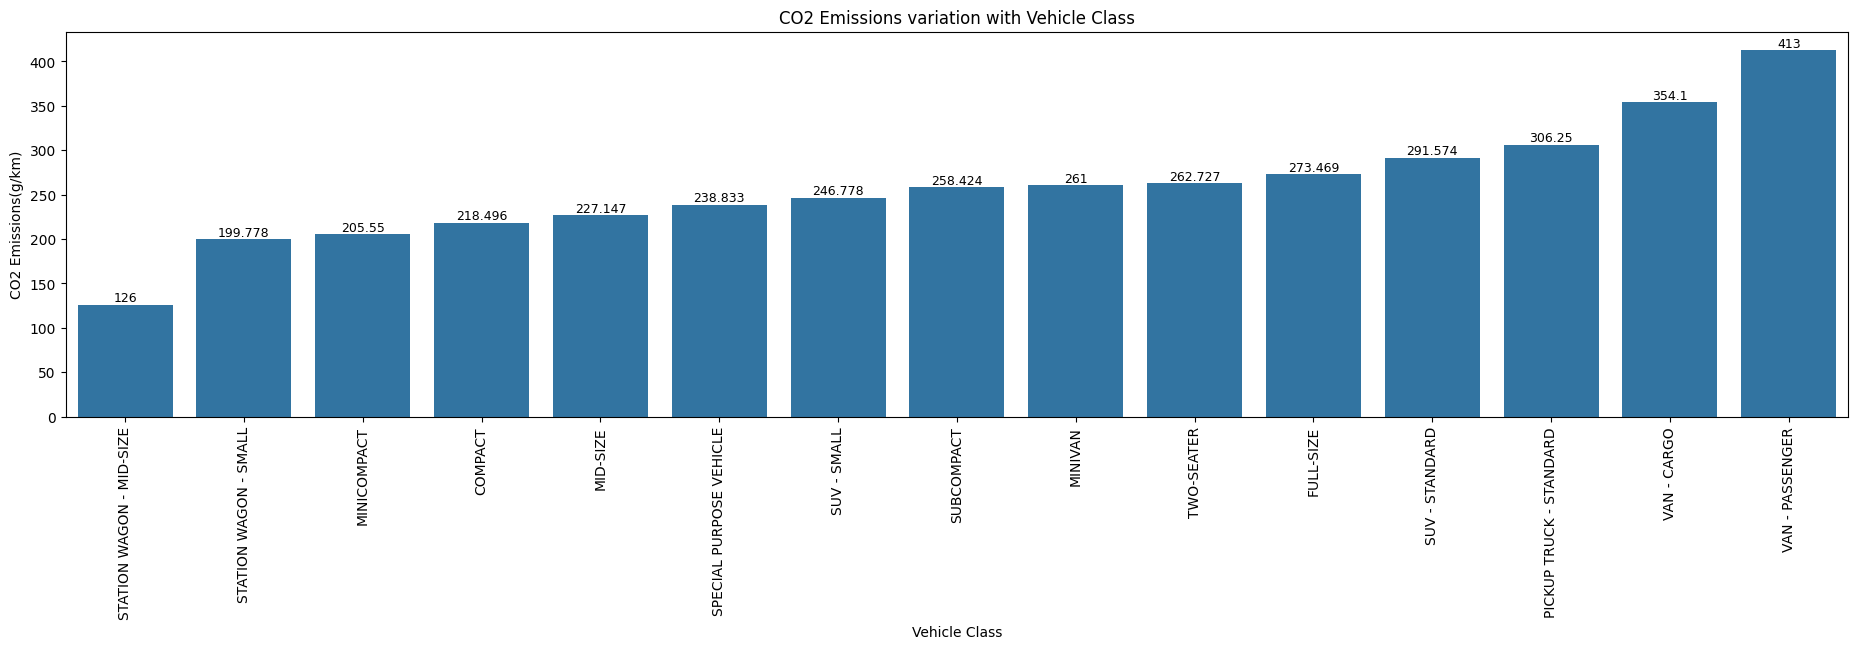

In [ ]:
plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = data_co2_vehicle_class, x = "VEHICLECLASS",  y= "CO2EMISSIONS")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

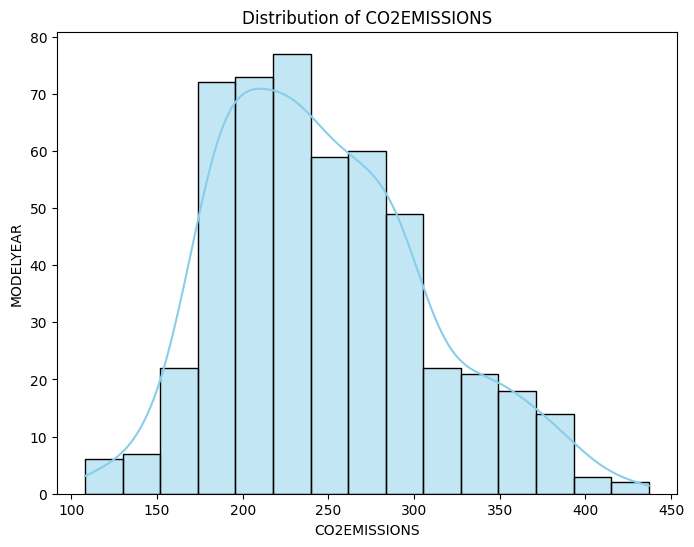

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(data['CO2EMISSIONS'], kde=True, color='skyblue')
plt.title('Distribution of CO2EMISSIONS')
plt.xlabel('CO2EMISSIONS')
plt.ylabel('MODELYEAR')
plt.show()


***CO2 Emissions variation with Fuel Type***

In [ ]:
data_co2_fuel_type = data.groupby(['FUELTYPE'])['CO2EMISSIONS'].mean().sort_values().reset_index()

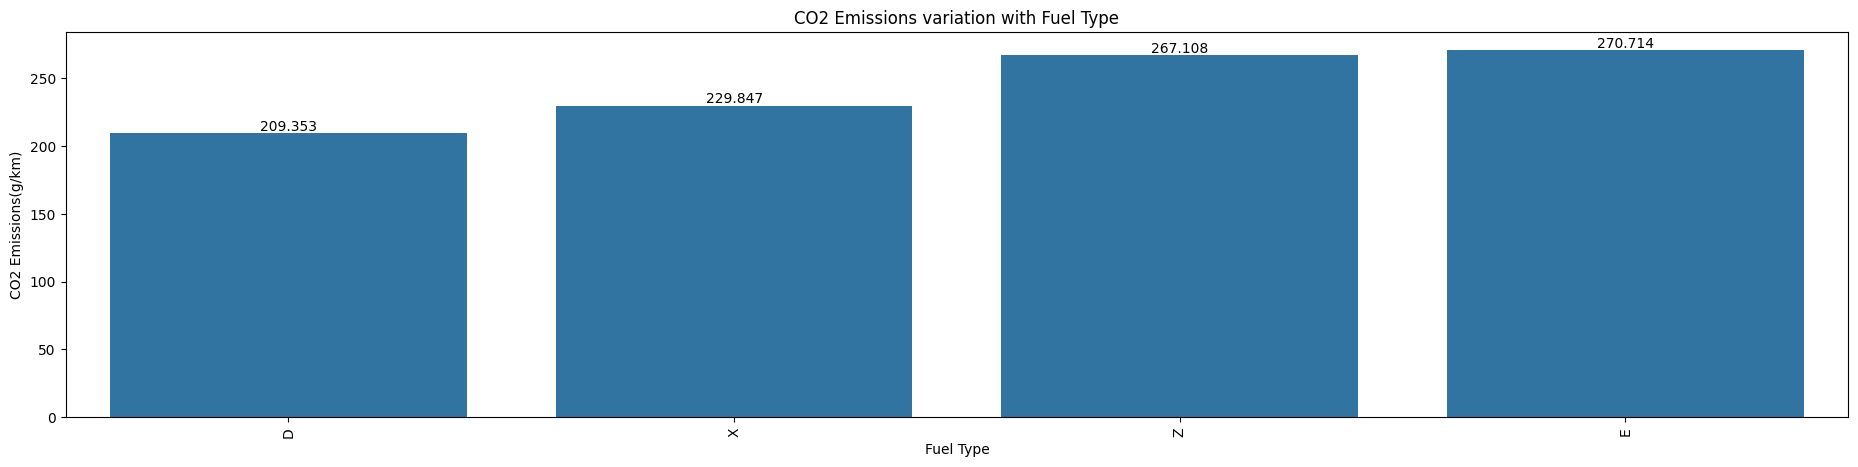

In [ ]:
plt.figure(figsize=(23,5))
figure11 = sns.barplot(data = data_co2_fuel_type, x = "FUELTYPE",  y= "CO2EMISSIONS")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0], fontsize=10)
plt.show()


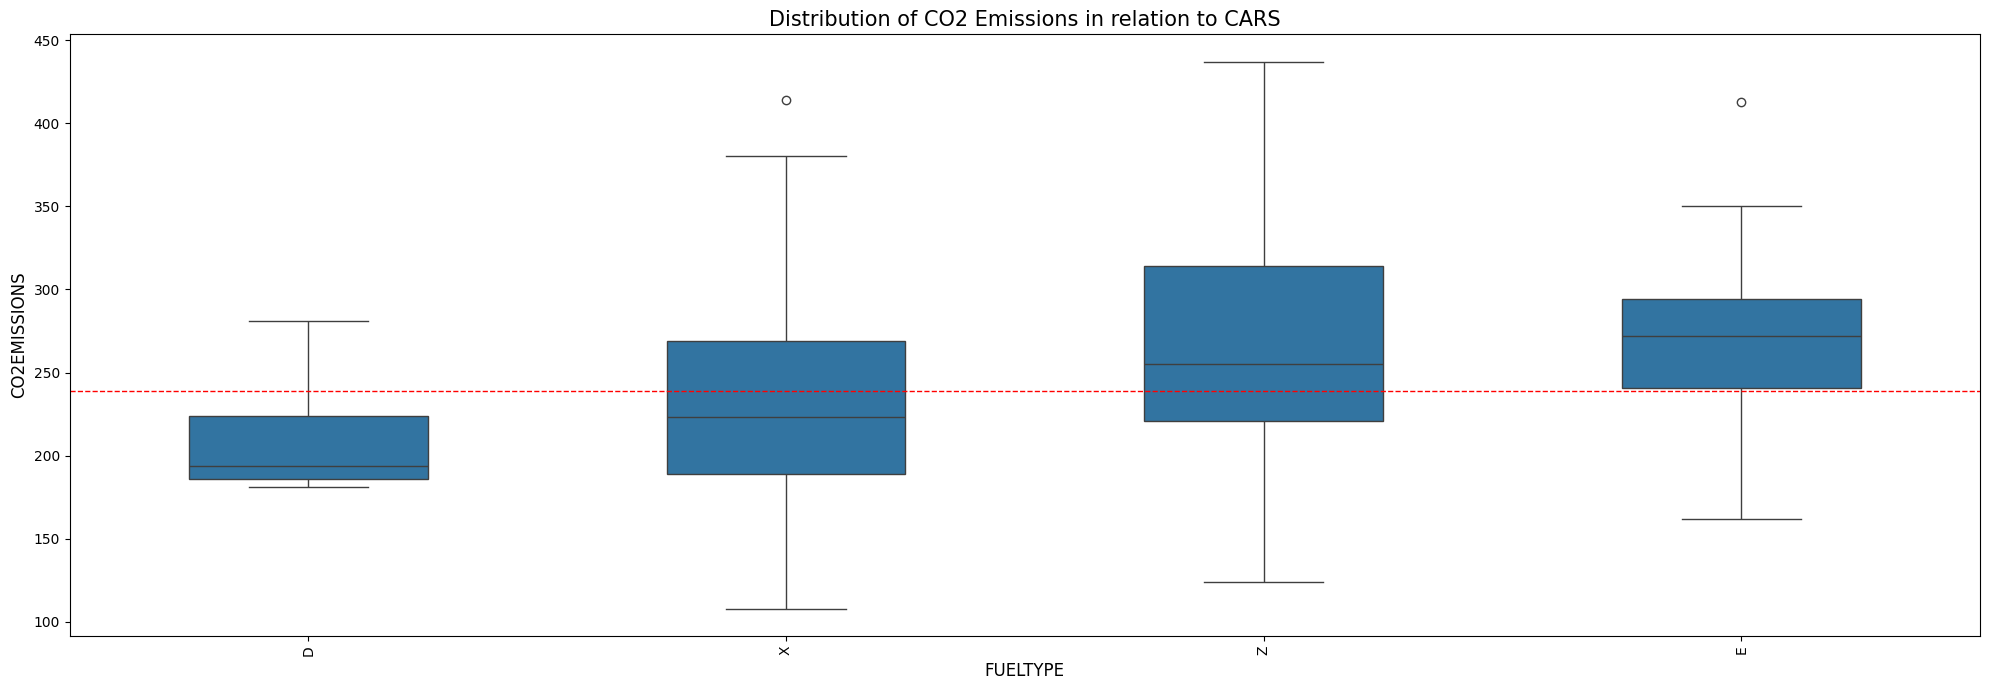

In [ ]:
plt.figure(figsize=(20,7))
order = data.groupby("FUELTYPE")["CO2EMISSIONS"].median().sort_values(ascending=True).index
sns.boxplot(x="FUELTYPE", y="CO2EMISSIONS", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to CARS", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("FUELTYPE", fontsize=12)
plt.ylabel("CO2EMISSIONS", fontsize=12)
plt.axhline(data["CO2EMISSIONS"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

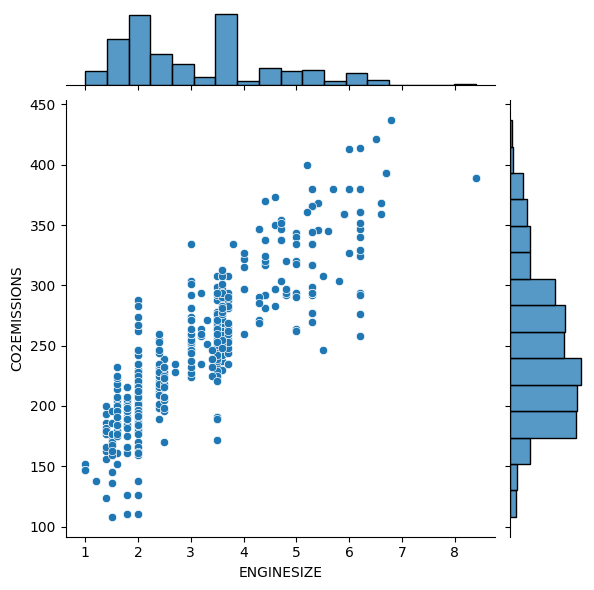

In [ ]:
# Jointplot
import seaborn as sns # import the seaborn library
sns.jointplot(x = data['ENGINESIZE'],y = data['CO2EMISSIONS']) # remove the tab character from the column name

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

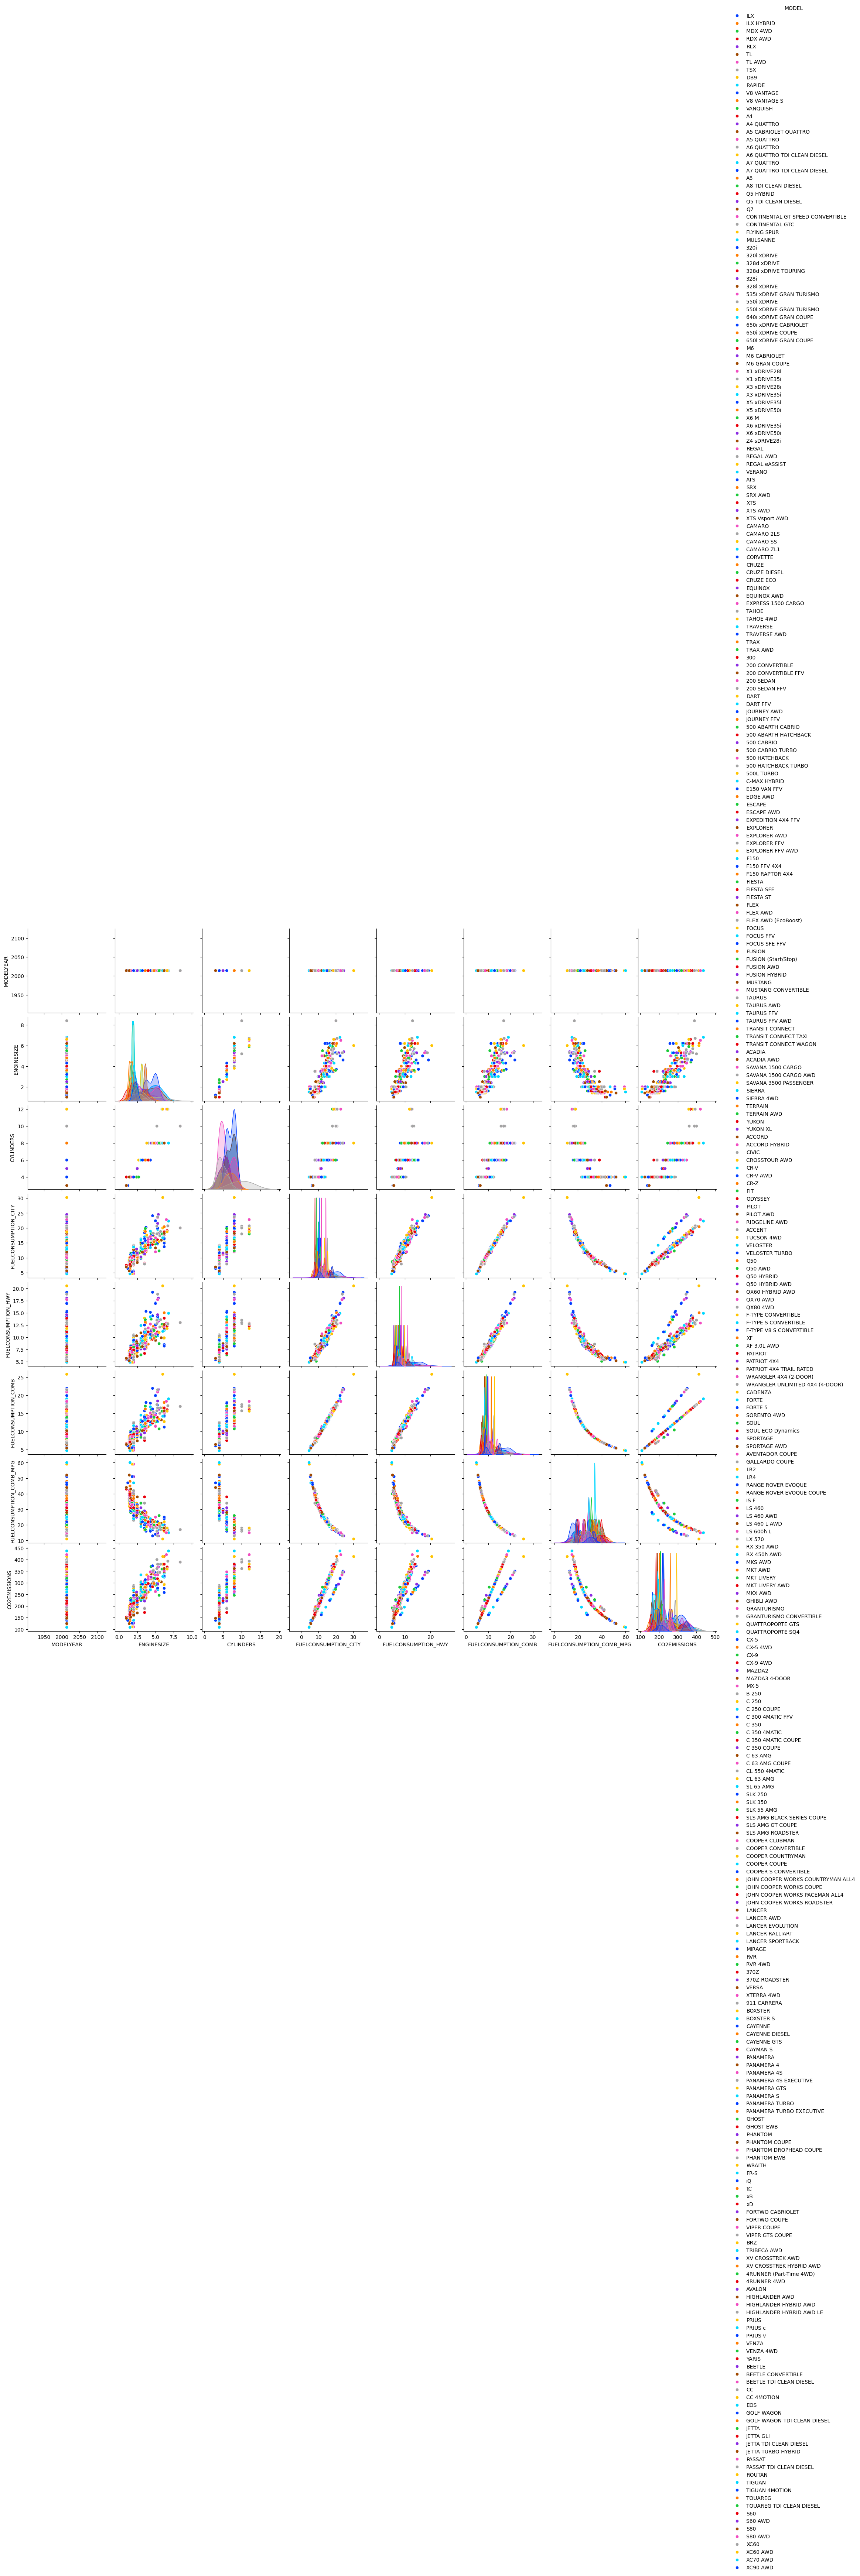

In [ ]:
# Pair plot to visualize pairwise relationships in the dataset
sns.pairplot(data, hue='MODEL', palette='bright')
plt.show()


***DATA CLEANING***

*We have to remove diesel data from our data set. Because we can predict anything by only using one record.*

In [ ]:
data_diesel=data[data["FUELTYPE"]=="Diesel"]
diesel=data_diesel.index
data_diesel

,MODELYEAR,CARS,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
27,2014,AUDI,A6 QUATTRO TDI CLEAN DIESEL,MID-SIZE,3.0,6,Automatic with Select Shift,Diesel,9.8,6.4,8.3,34,224
29,2014,AUDI,A7 QUATTRO TDI CLEAN DIESEL,MID-SIZE,3.0,6,Automatic with Select Shift,Diesel,9.8,6.4,8.3,34,224
32,2014,AUDI,A8 TDI CLEAN DIESEL,MID-SIZE,3.0,6,Automatic with Select Shift,Diesel,10.0,6.4,8.4,34,227
34,2014,AUDI,Q5 TDI CLEAN DIESEL,SUV - SMALL,3.0,6,Automatic with Select Shift,Diesel,10.3,7.6,9.1,31,246
44,2014,BMW,328d xDRIVE,COMPACT,2.0,4,Automatic,Diesel,7.6,5.5,6.7,42,181
45,2014,BMW,328d xDRIVE TOURING,STATION WAGON - SMALL,2.0,4,Automatic,Diesel,7.6,5.5,6.7,42,181
100,2014,CHEVROLET,CRUZE DIESEL,MID-SIZE,2.0,4,Automatic with Select Shift,Diesel,8.7,5.1,7.1,40,192
408,2014,PORSCHE,CAYENNE DIESEL,SUV - STANDARD,3.0,6,Automatic,Diesel,12.2,8.1,10.4,27,281
462,2014,VOLKSWAGEN,BEETLE TDI CLEAN DIESEL,COMPACT,2.0,4,Automatic,Diesel,8.2,6.1,7.3,39,197
463,2014,VOLKSWAGEN,BEETLE TDI CLEAN DIESEL,COMPACT,2.0,4,Manual,Diesel,8.5,5.8,7.3,39,197


In [ ]:
# We have to remove Diesel from our data set
for i in diesel:
    data.drop(i, axis = 0,inplace = True)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data[data["FUELTYPE"]=="Diesel"]

,MODELYEAR,CARS,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


In [ ]:
data.head()

,MODELYEAR,CARS,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


In [ ]:
data_check = data['FUELTYPE'].value_counts().reset_index().rename(columns={'count':'Count'})
data_check

,FUELTYPE,Count
0,Regular Gasoline,249
1,Premium Gasoline,204
2,Ethanol(E85),35


In [ ]:
data.tail()

,MODELYEAR,CARS,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
483,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,Automatic with Select Shift,Regular Gasoline,13.4,9.8,11.8,24,271
484,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,Automatic with Select Shift,Regular Gasoline,13.2,9.5,11.5,25,264
485,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,Automatic with Select Shift,Regular Gasoline,13.4,9.8,11.8,24,271
486,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,Automatic with Select Shift,Regular Gasoline,12.9,9.3,11.3,25,260
487,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,Automatic with Select Shift,Regular Gasoline,14.9,10.2,12.8,22,294


***Data Preprocessing***

In [ ]:
# Handling missing value
# Impute missing values with the mean
data['ENGINESIZE'].fillna(data['ENGINESIZE'].mean(), inplace=True)
data['FUELCONSUMPTION_CITY'].fillna(data['FUELCONSUMPTION_CITY'].mean(), inplace=True)
data['FUELCONSUMPTION_HWY'].fillna(data['FUELCONSUMPTION_HWY'].mean(), inplace=True)
data['FUELCONSUMPTION_COMB'].fillna(data['FUELCONSUMPTION_COMB'].mean(), inplace=True)

# Check for missing values
print(data.isnull().sum())


MODELYEAR                   0
CARS                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


<ipython-input-46-fd6ef45b0358>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ENGINESIZE'].fillna(data['ENGINESIZE'].mean(), inplace=True)
<ipython-input-46-fd6ef45b0358>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# One-hot encode the categorical variables
data_encoded = pd.get_dummies(data, columns=['CARS', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], drop_first=True)

# Display the first few rows of the encoded dataframe
print(data_encoded.head())

   MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0       2014         2.0          4                   9.9   
1       2014         2.4          4                  11.2   
2       2014         1.5          4                   6.0   
3       2014         3.5          6                  12.7   
4       2014         3.5          6                  12.1   

   FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
0                  6.7                   8.5                        33   
1                  7.7                   9.6                        29   
2                  5.8                   5.9                        48   
3                  9.1                  11.1                        25   
4                  8.7                  10.6                        27   

   CO2EMISSIONS  CARS_ASTON MARTIN  CARS_AUDI  ...  TRANSMISSION_AV  \
0           196              False      False  ...            False   
1           221              False      False 

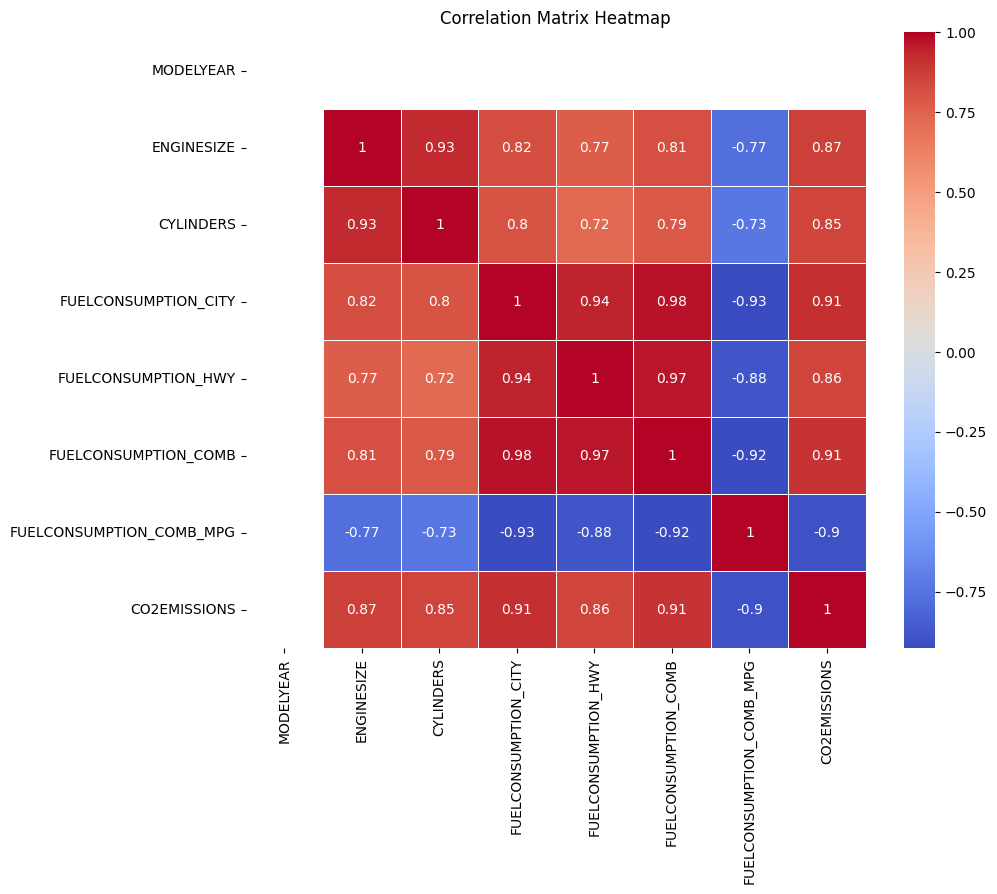

In [ ]:
# Heatmap to visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation analysis
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Use mean imputation
data_encoded = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns to scale
numerical_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                  'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                  'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the first few rows after scaling
print(data_encoded.head())

   MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0     2014.0   -0.797610  -0.839733             -0.747244   
1     2014.0   -0.511199  -0.839733             -0.401968   
2     2014.0   -1.155623  -0.839733             -1.783071   
3     2014.0    0.276430   0.225757             -0.003573   
4     2014.0    0.276430   0.225757             -0.162931   

   FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
0            -0.944054             -0.802819                  0.713280   
1            -0.540833             -0.453090                  0.188198   
2            -1.306952             -1.629451                  2.682338   
3             0.023676              0.023813                 -0.336884   
4            -0.137612             -0.135154                 -0.074343   

   CO2EMISSIONS  CARS_ASTON MARTIN  CARS_AUDI  ...  TRANSMISSION_AV  \
0     -0.839772                0.0        0.0  ...              0.0   
1     -0.428455                0.0        0.0 

***Model Selection***

***1) Linear Regression***

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable (CO2EMISSIONS) and feature variables (drop CO2EMISSIONS)
X = data_encoded.drop('CO2EMISSIONS', axis=1)
y = data_encoded['CO2EMISSIONS']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (404, 411)
X_test shape: (101, 411)
y_train shape: (404,)
y_test shape: (101,)


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error

# Define the target variable (CO2EMISSIONS) and feature variables (drop CO2EMISSIONS)
X = data_encoded.drop('CO2EMISSIONS', axis=1)
y = data_encoded['CO2EMISSIONS']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) # Calculate MAE
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae) # Print MAE
print("Root Mean Squared Error (RMSE):", rmse)

# Display the model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 1.9194180403741542e+18
R-squared (R2): -1.8837006674099668e+18
Mean Absolute Error (MAE): 765086500.6454
Root Mean Squared Error (RMSE): 1385430633.5483398
Coefficients: [ 3.95085681e+11 -8.04035452e-03  1.61141230e-01  3.72093701e-02
  1.78922562e-01  6.97681965e-02 -6.61185055e-01 -1.41120159e+09
  7.42279872e+08 -2.03676973e+09 -1.29219592e+09  2.85459817e+09
 -2.38339732e+09 -3.72675185e+09 -2.31844762e+09 -4.39368575e+09
 -1.88384925e+09 -2.26358518e+09 -4.12874163e+09 -1.71025600e+09
 -4.61157702e+09 -6.05846673e+08 -1.81686896e+09 -4.02303928e+09
 -1.82365335e+09 -5.39885343e+09 -4.91107718e+08 -2.78456885e+09
 -4.18844708e+08 -7.28122974e+08 -1.97830714e+09 -1.73876573e+09
 -1.66110229e+09 -6.73560581e+08 -4.22689370e+08 -4.18602128e+08
 -1.89201820e+09 -8.94883501e+08  1.39797044e+09 -1.11555542e+09
 -1.13231740e+09 -1.71792739e+09 -5.76473155e+08 -2.01645170e+09
 -7.66401291e-02  1.70761139e+08  1.70761139e+08  4.97509318e+08
 -1.02625170e+09 -1.0262

2) *** SVM Model ***

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Support Vector Machine model for regression
svm_model = SVR()

# Train the SVM model using the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Display the results
print("SVM Mean Squared Error (MSE):", mse_svm)
print("SVM R-squared (R2):", r2_svm)


SVM Mean Squared Error (MSE): 1.0422775402783047
SVM R-squared (R2): -0.022882382550674096


3) *** Decision Tree ***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display the results
print("Decision Tree Mean Squared Error (MSE):", mse_dt)
print("Decision Tree R-squared (R2):", r2_dt)

# Display the feature importances
print("Feature Importances:", dt_model.feature_importances_)


Decision Tree Mean Squared Error (MSE): 0.005915012098237295
Decision Tree R-squared (R2): 0.9941950570418648
Feature Importances: [0.00000000e+00 3.11125493e-03 7.77583711e-06 1.60595633e-02
 1.67973290e-02 1.61021983e-01 7.43243109e-01 2.69293060e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.89016266e-05 1.34646530e-05 0.00000000e+00
 0.00000000e+00 6.59767997e-05 1.34646530e-06 6.28350474e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.79528707e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

*** Comparing the above 3 models ***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
linear_model = LinearRegression()
svm_model = SVR()
dt_model = DecisionTreeRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = linear_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the models using MSE and R-squared (R²)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Store results in a dictionary
results = {
    'Linear Regression': {'MSE': mse_lr, 'R2': r2_lr},
    'SVM': {'MSE': mse_svm, 'R2': r2_svm},
    'Decision Tree': {'MSE': mse_dt, 'R2': r2_dt}
}

# Find the best model based on R-squared
best_model = max(results, key=lambda model: results[model]['R2'])

# Display the results
print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_lr)
print("R-squared (R2):", r2_lr)

print("\nSupport Vector Machine (SVM):")
print("Mean Squared Error (MSE):", mse_svm)
print("R-squared (R2):", r2_svm)

print("\nDecision Tree:")
print("Mean Squared Error (MSE):", mse_dt)
print("R-squared (R2):", r2_dt)

# Display the best model
print(f"\nBest Model: {best_model} with R-squared: {results[best_model]['R2']}")


Linear Regression:
Mean Squared Error (MSE): 1.9194180403741542e+18
R-squared (R2): -1.8837006674099668e+18

Support Vector Machine (SVM):
Mean Squared Error (MSE): 1.0422775402783047
R-squared (R2): -0.022882382550674096

Decision Tree:
Mean Squared Error (MSE): 0.005915012098237295
R-squared (R2): 0.9941950570418648

Best Model: Decision Tree with R-squared: 0.9941950570418648


In [ ]:
#Models R2 Score Comparison Table
data = {"Model": ["Linear Regression", "Decision Tree", "SVM"],
        "R2 Score": [r2_lr, r2_dt, r2_svm]}
data = pd.DataFrame(data)


In [ ]:
data

,Model,R2 Score
0,Linear Regression,-1.883701e+18
1,Decision Tree,9.941951e-01
2,SVM,-2.288238e-02


In [ ]:
# importing pickle model
import pickle as pk


In [ ]:
pk.dump(model,open('model.pkl','wb'))